In [2]:
# intern module
import tcu_data as tcu

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/renatoaranha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import importlib
importlib.reload(tcu)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/renatoaranha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<module 'tcu_data' from '/Users/renatoaranha/PycharmProjects/Portal_TCU/tcu_data.py'>

In [4]:
# path = "../Portal_TCU_conflito_interesse/raw_req/"
# docx_list = tcu.get_docx_files(path)

In [6]:
# run only if there is a saved corpus file
txt_file = '../corpus_conflito_interesses.txt'
corpus = tcu.load_corpus_file(txt_file)

In [5]:
# txt_file = 'corpus_conflito_interesses.txt'
# corpus = tcu.generate_corpus(txt_file, docx_list)

In [6]:
corpus = tcu.replaces_in_corpus(corpus)

In [7]:
blacklist = tcu.blacklist
text_total = tcu.remove_blacklist(corpus, blacklist)

In [8]:
text_term = tcu.filter_text_chunks(text_total, topic='CONF_INTERESSE')

In [10]:
corpus_tfidf_Tot = tcu.filter_corpus(text_term, text_total, which_text='TOTAL')
corpus_tfidf_Term = tcu.filter_corpus(text_term, text_total, which_text='TERM')

In [11]:
total_topics = 5
lda_total, corpus_lda_total = tcu.generate_lda(total_topics, text_term, text_total, which_text='TOTAL')
lda_term, corpus_lda_term = tcu.generate_lda(total_topics, text_term, text_total, which_text='TERM')

In [12]:
tcu.show_N_terms(lda_term, lda_total, total_topics)

Term:  [(0, '0.027*"conflito_de_interesses" + 0.011*"não" + 0.006*"público" + 0.003*"direito" + 0.003*"administração" + 0.002*"atividades" + 0.002*"caso" + 0.002*"bem" + 0.002*"participação" + 0.002*"lei"'), (1, '0.027*"conflito_de_interesses" + 0.019*"não" + 0.008*"público" + 0.005*"contratações" + 0.004*"lei" + 0.003*"caso" + 0.003*"processo" + 0.003*"administração" + 0.003*"serviços" + 0.002*"social"'), (2, '0.021*"conflito_de_interesses" + 0.010*"não" + 0.005*"público" + 0.004*"petrobrás" + 0.003*"recursos" + 0.003*"atuação" + 0.003*"fundiária" + 0.003*"regularização" + 0.003*"administração" + 0.003*"entidades"'), (3, '0.026*"conflito_de_interesses" + 0.009*"não" + 0.006*"público" + 0.003*"gestão" + 0.003*"caso" + 0.003*"informações" + 0.003*"riscos" + 0.003*"estudos" + 0.002*"prazo" + 0.002*"investimentos"'), (4, '0.027*"conflito_de_interesses" + 0.017*"não" + 0.011*"público" + 0.004*"princípios" + 0.004*"administração" + 0.003*"recursos" + 0.003*"serviços" + 0.003*"forma" + 0.003

In [13]:
df_lda_term, df_lda_total = tcu.prepare_data_clustermap(lda_term, lda_total, total_topics)

df_lda_term shape: (5, 28)
df_lda_total shape: (5, 46)


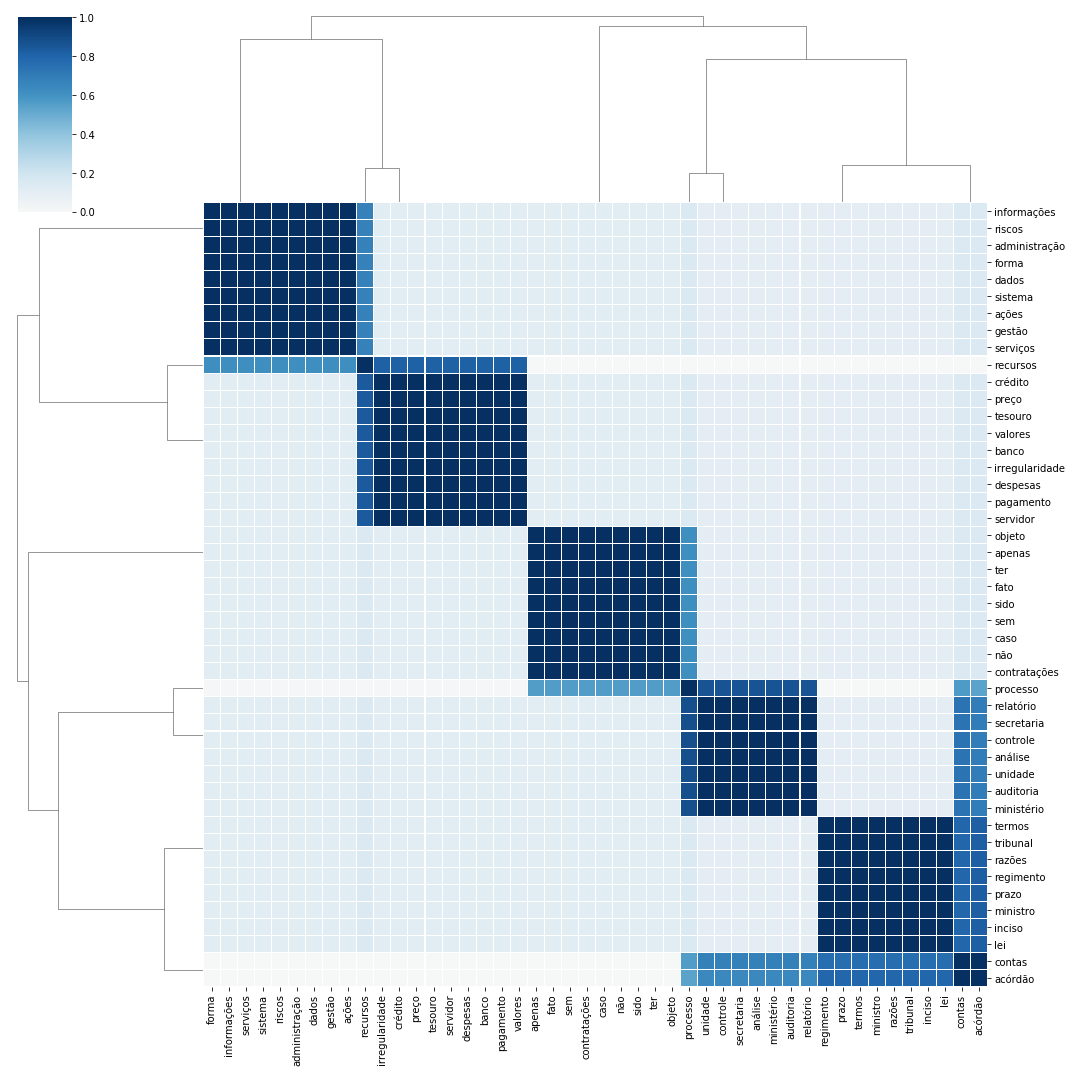

In [14]:
tcu.generate_clustermap(df_lda_total, df_lda_term, which_text='TOTAL')

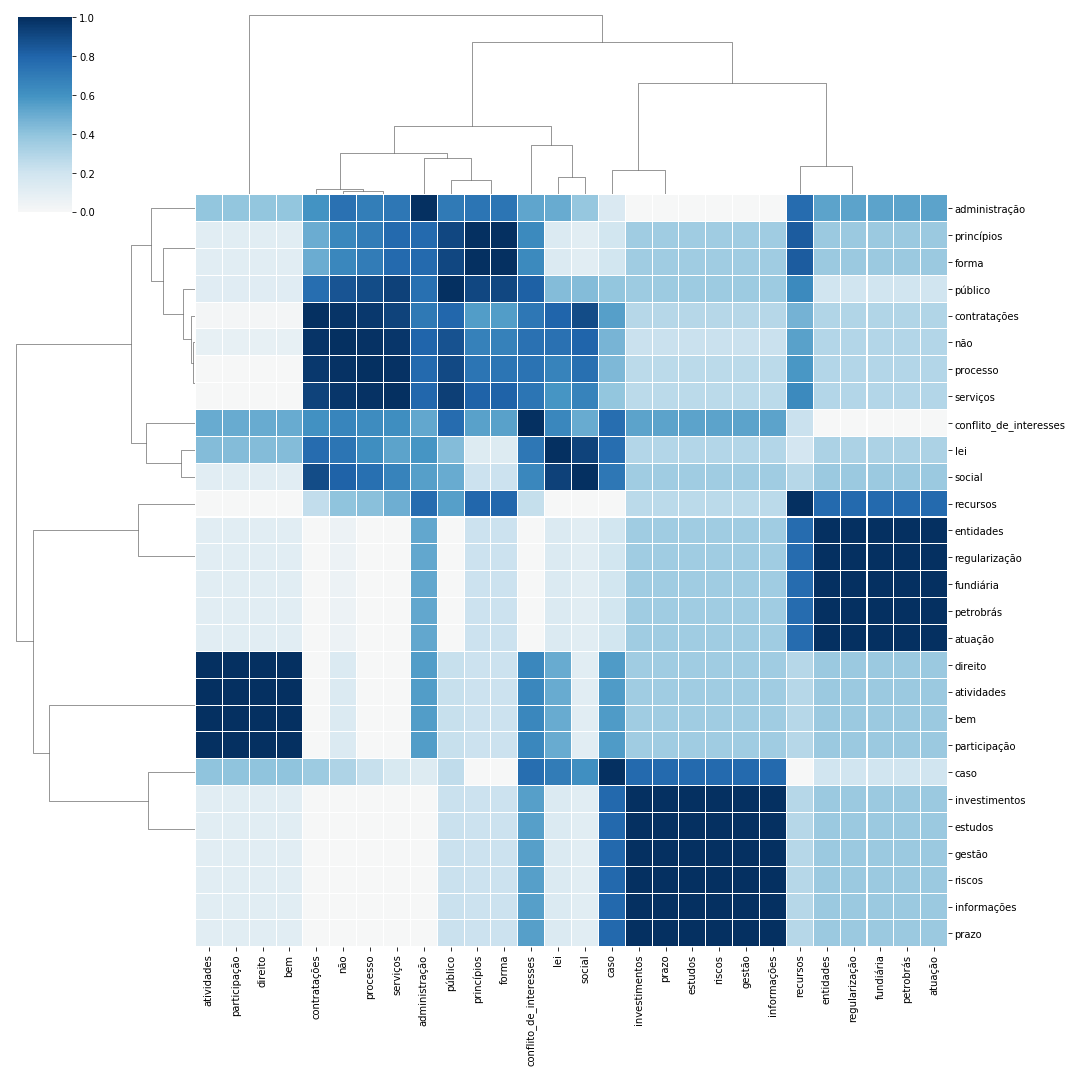

In [15]:
tcu.generate_clustermap(df_lda_total, df_lda_term, which_text='TERM')

In [16]:
dict_term, dict_total = tcu.gera_dicts(text_term, text_total)

In [17]:
# %%time
# tcu.generate_lda_vis(lda_total, corpus_lda_total, lda_term, corpus_lda_term, dict_term, dict_total, which_text='TOTAL')

In [18]:
%%time
tcu.generate_lda_vis(_,_, lda_term, corpus_lda_term, dict_term, dict_total, which_text='TERM')

/Users/renatoaranha/PycharmProjects/venv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


CPU times: user 44.3 s, sys: 6.75 s, total: 51 s
Wall time: 24min 42s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.059945 -0.027963       1        1  42.081558
1      0.055925 -0.033310       2        1  21.004612
0      0.010328 -0.014116       3        1  12.479650
2     -0.118941 -0.037893       4        1  12.230698
3     -0.007257  0.113283       5        1  12.203483, topic_info=     Category        Freq                    Term       Total  loglift  \
7     Default  252.000000  conflito_de_interesses  252.000000  30.0000   
6860  Default    4.000000               petrobrás    4.000000  29.0000   
35    Default  143.000000                     não  143.000000  28.0000   
6407  Default    4.000000               fundiária    4.000000  27.0000   
6409  Default    5.000000           regularização    5.000000  26.0000   
...       ...         ...                     ...         ...      ...   
50     Topic5    1.966525                 análise   11.947061   0.2992   
118    Topic5    2.104697                controle   17.597456  -0.0201   
262    Topic5    1.962233                   ações   13.657629   0.1632   
587    Topic5    1.866215                projetos   10.869217   0.3414   
728    Topic5    1.962699           administração   30.353821  -0.6352   

      logprob  
7     30.0000  
6860  29.0000  
35    28.0000  
6407  27.0000  
6409  26.0000  
...       ...  
50    -6.4013  
118   -6.3334  
262   -6.4035  
587   -6.4536  
728   -6.4032  

[459 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
7541      5  1.335588  (parágrafos
6505      1  1.173276        2009,
2846      1  0.792004           2º
2270      1  0.864244          2º,
2270      2  0.216061          2º,
...     ...       ...          ...
542       2  0.317848       órgãos
542       3  0.211899       órgãos
542       4  0.211899       órgãos
542       5  0.105949       órgãos
1209      1  0.900518       único,

[601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 4])